In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in the dataset
gas_prod_input = pd.read_csv("/content/drive/MyDrive/AI_Project/gold_price_data.csv")

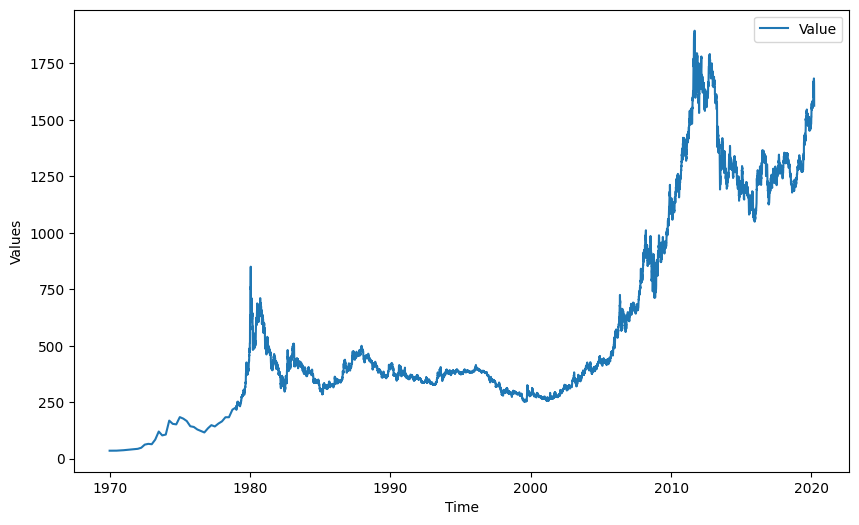

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime and set it as the index
gas_prod_input['Date'] = pd.to_datetime(gas_prod_input['Date'])
gas_prod_input.set_index('Date', inplace=True)

# Plot each column
plt.figure(figsize=(10, 6))
for column in gas_prod_input.columns:
    plt.plot(gas_prod_input.index, gas_prod_input[column], label=column)

# Set labels and legend
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend(loc='upper right')
plt.show()

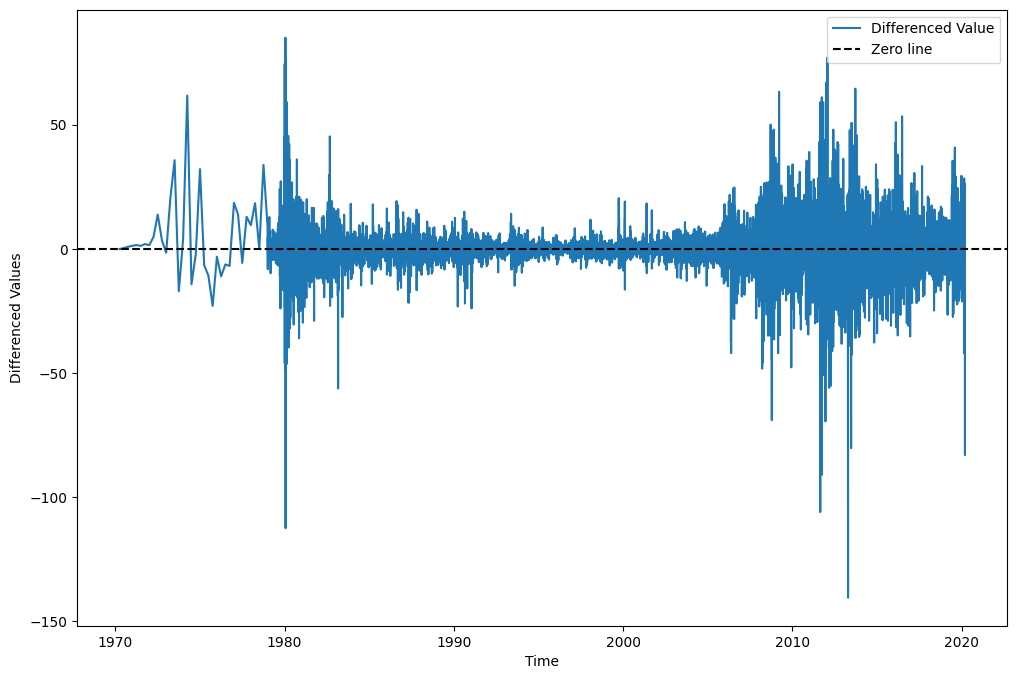

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Take the difference of the time series for each feature
diff_gas_prod = gas_prod_input.diff()

# Plot the differenced series for each feature
plt.figure(figsize=(12, 8))
for column in diff_gas_prod.columns:
    plt.plot(diff_gas_prod.index, diff_gas_prod[column], label=f'Differenced {column}')

# Add a zero reference line
plt.axhline(y=0, color='black', linestyle='--', label='Zero line')

# Set labels and legend
plt.xlabel("Time")
plt.ylabel("Differenced Values")
plt.legend(loc='upper right')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# Calculate the difference of the time series for each feature
diff_gas_prod = gas_prod_input.diff()

# Specify lag values
lags = np.arange(0, 49, 4)

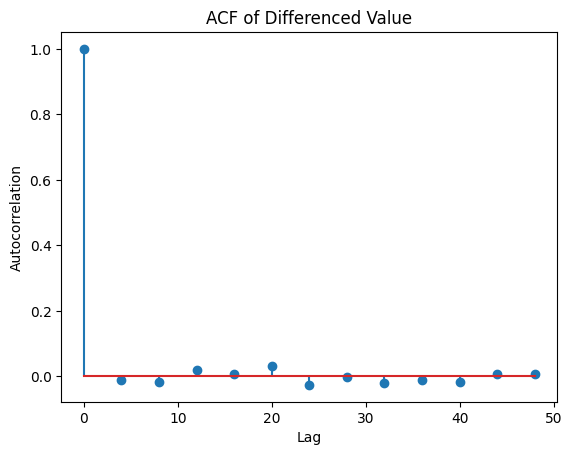

In [ ]:
# Plot ACF for a specific column (replace 'Value' with the desired column)
acf_vals = acf(diff_gas_prod['Value'].dropna(), nlags=48)
plt.stem(lags, acf_vals[::4])
plt.title("ACF of Differenced Value")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

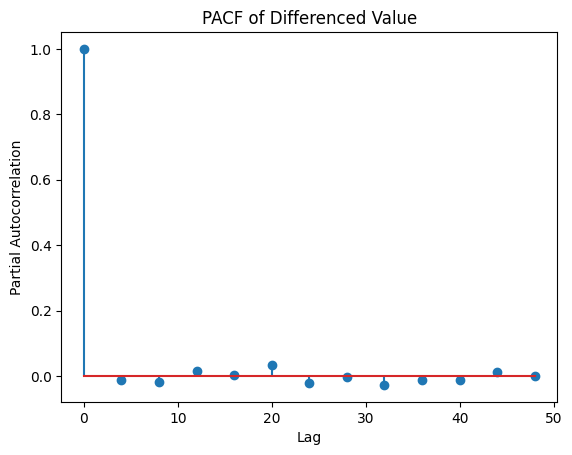

In [ ]:
# Plot PACF for a specific column (replace 'Value' with the desired column)
pacf_vals = pacf(diff_gas_prod['Value'].dropna(), nlags=48)
plt.stem(lags, pacf_vals[::4])
plt.title("PACF of Differenced Value")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Specify the order for the ARIMA model
order = (0, 1, 0)
seasonal_order = (1, 0, 0, 12)  # Assuming a seasonality period of 12 months

# Fit ARIMA model for a specific column (replace 'Value' with the desired column)
column_name = 'Value'  # Replace with the actual column name
arima_model = ARIMA(gas_prod_input[column_name], order=order, seasonal_order=seasonal_order)
arima_results = arima_model.fit()

# Display the model summary
print(arima_results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                            Value   No. Observations:                10787
Model:             ARIMA(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood              -39042.161
Date:                          Thu, 16 Nov 2023   AIC                          78088.322
Time:                                  17:49:03   BIC                          78102.894
Sample:                                       0   HQIC                         78093.236
                                        - 10787                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0206      0.005      4.247      0.000       0.011       0.030
sigma2        81.5760      0.324    251.969      0.

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Fit ARIMA(0, 1, 0) x (1, 0, 0)12 model
arima_1 = ARIMA(gas_prod_input['Value'], order=(0, 1, 0), seasonal_order=(1, 0, 0, 12))
arima_results_1 = arima_1.fit()

# Extract residuals
residuals_1 = arima_results_1.resid

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1200x400 with 0 Axes>

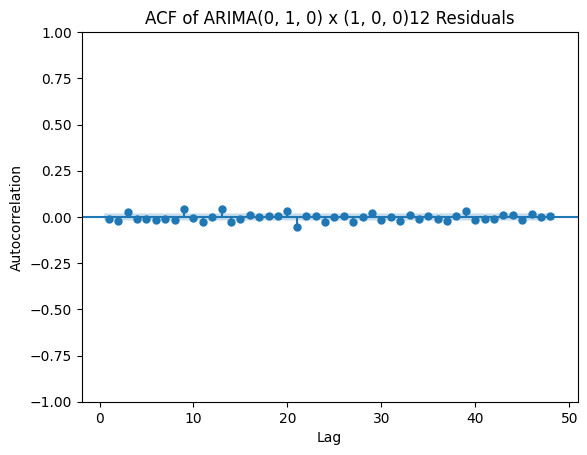

In [ ]:
# Plot ACF of residuals
plt.figure(figsize=(12, 4))
plot_acf(residuals_1, lags=48, zero=False)
plt.title("ACF of ARIMA(0, 1, 0) x (1, 0, 0)12 Residuals")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

<Figure size 1200x400 with 0 Axes>

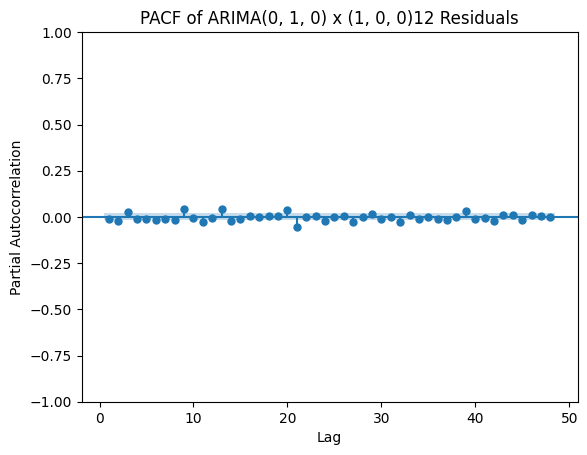

In [ ]:
# Plot PACF of residuals
plt.figure(figsize=(12, 4))
plot_pacf(residuals_1, lags=48, zero=False)
plt.title("PACF of ARIMA(0, 1, 0) x (1, 0, 0)12 Residuals")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.show()

In [ ]:
# Specify the order for the ARIMA model
order = (0, 1, 1)
seasonal_order = (1, 0, 0, 12)  # Assuming a seasonality period of 12 months

# Fit ARIMA model for a specific column (replace 'Value' with the desired column)
column_name = 'Value'  # Replace with the actual column name
arima_model_2 = ARIMA(gas_prod_input[column_name], order=order, seasonal_order=seasonal_order)
arima_results_2 = arima_model_2.fit()

# Display the model summary
print(arima_results_2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                             Value   No. Observations:                10787
Model:             ARIMA(0, 1, 1)x(1, 0, [], 12)   Log Likelihood              -39041.334
Date:                           Thu, 16 Nov 2023   AIC                          78088.667
Time:                                   17:49:09   BIC                          78110.525
Sample:                                        0   HQIC                         78096.038
                                         - 10787                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0126      0.004     -2.818      0.005      -0.021      -0.004
ar.S.L12       0.0208      0.005      4.242

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Extract residuals from ARIMA(0, 1, 1) x (1, 0, 0)12 model
residuals_2 = arima_results_2.resid

<Figure size 1200x400 with 0 Axes>

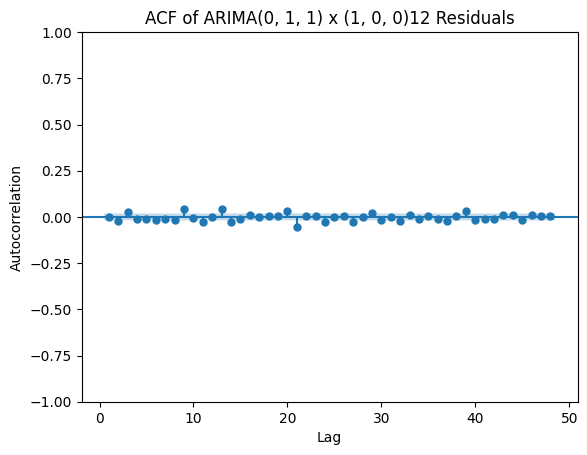

In [ ]:
# Plot ACF of residuals
plt.figure(figsize=(12, 4))
plot_acf(residuals_2, lags=48, zero=False)
plt.title("ACF of ARIMA(0, 1, 1) x (1, 0, 0)12 Residuals")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

<Figure size 1200x400 with 0 Axes>

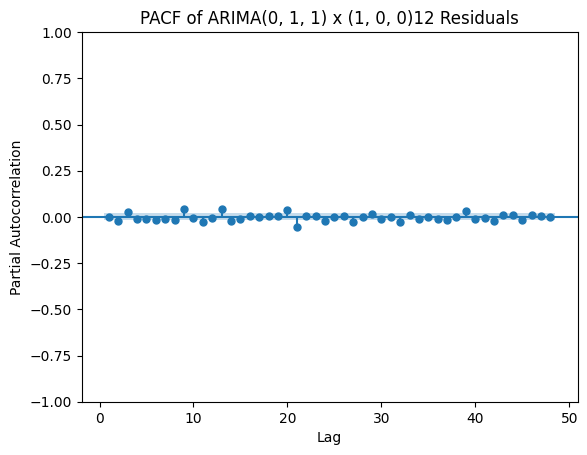

In [ ]:
# Plot PACF of residuals
plt.figure(figsize=(12, 4))
plot_pacf(residuals_2, lags=48, zero=False)
plt.title("PACF of ARIMA(0, 1, 1) x (1, 0, 0)12 Residuals")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.show()

<Figure size 1200x400 with 0 Axes>

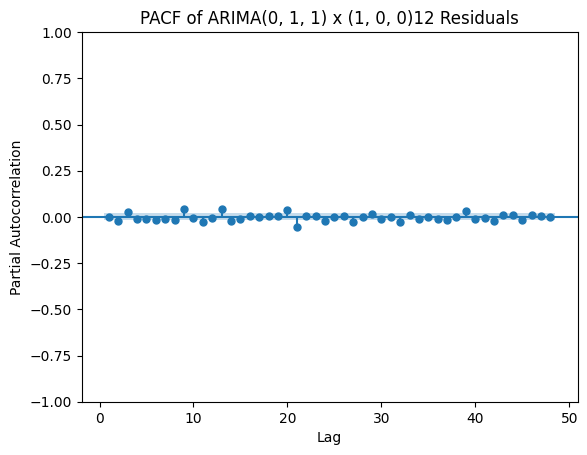

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Extract residuals from ARIMA(0, 1, 1) x (1, 0, 0)12 model
residuals_2 = arima_results_2.resid

# Plot PACF of residuals
plt.figure(figsize=(12, 4))
plot_pacf(residuals_2, lags=48, zero=False)
plt.title("PACF of ARIMA(0, 1, 1) x (1, 0, 0)12 Residuals")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have fitted ARIMA models as arima_results_1, arima_results_2, etc.
# Make sure to replace these with the actual fitted models in your code.

# ARIMA model 1: ARIMA(0, 1, 0) x (1, 0, 0)12
arima_model_1 = ARIMA(gas_prod_input['Value'], order=(0, 1, 0), seasonal_order=(1, 0, 0, 12))
arima_results_1 = arima_model_1.fit()

# ARIMA model 2: ARIMA(0, 1, 1) x (1, 0, 0)12
arima_model_2 = ARIMA(gas_prod_input['Value'], order=(0, 1, 1), seasonal_order=(1, 0, 0, 12))
arima_results_2 = arima_model_2.fit()

# Calculate information criteria
aic_1 = arima_results_1.aic
aicc_1 = arima_results_1.aicc
bic_1 = arima_results_1.bic

aic_2 = arima_results_2.aic
aicc_2 = arima_results_2.aicc
bic_2 = arima_results_2.bic

# Print the information criteria for model comparison
print("ARIMA(0, 1, 0) x (1, 0, 0)12:")
print(f"AIC: {aic_1}, AICc: {aicc_1}, BIC: {bic_1}\n")

print("ARIMA(0, 1, 1) x (1, 0, 0)12:")
print(f"AIC: {aic_2}, AICc: {aicc_2}, BIC: {bic_2}\n")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0) x (1, 0, 0)12:
AIC: 78088.32205855713, AICc: 78088.32317141996, BIC: 78102.89406710892

ARIMA(0, 1, 1) x (1, 0, 0)12:
AIC: 78088.66740742745, AICc: 78088.66963335956, BIC: 78110.52542025514



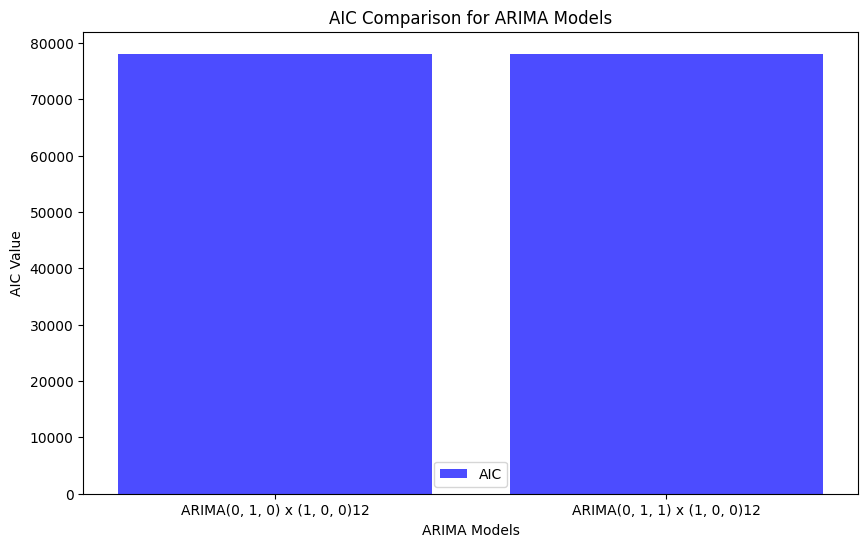

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have AIC, AICc, and BIC values for each model
# Replace these with the actual values obtained from your models
aic_values = [aic_1, aic_2]
aicc_values = [aicc_1, aicc_2]
bic_values = [bic_1, bic_2]

model_names = ['ARIMA(0, 1, 0) x (1, 0, 0)12', 'ARIMA(0, 1, 1) x (1, 0, 0)12']
# Bar plot for AIC
plt.figure(figsize=(10, 6))
plt.bar(model_names, aic_values, color='blue', alpha=0.7, label='AIC')
plt.title('AIC Comparison for ARIMA Models')
plt.xlabel('ARIMA Models')
plt.ylabel('AIC Value')
plt.legend()
plt.show()

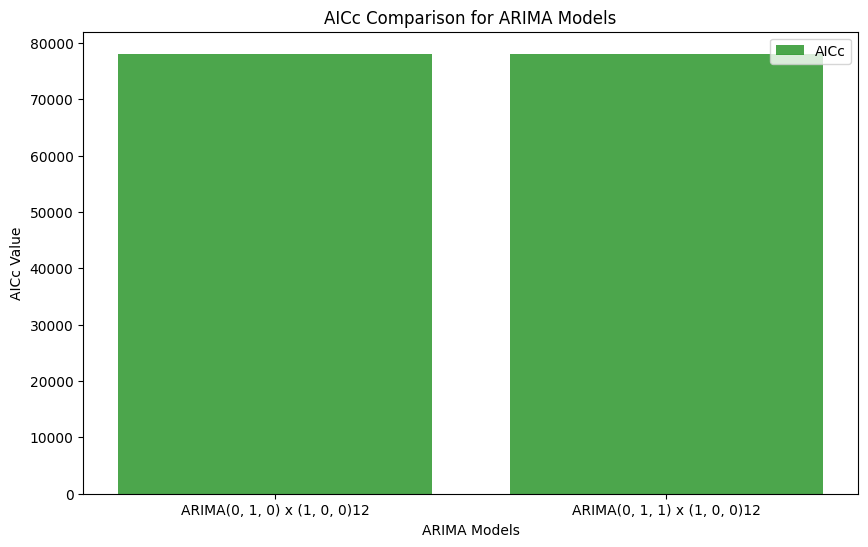

In [ ]:
# Bar plot for AICc
plt.figure(figsize=(10, 6))
plt.bar(model_names, aicc_values, color='green', alpha=0.7, label='AICc')
plt.title('AICc Comparison for ARIMA Models')
plt.xlabel('ARIMA Models')
plt.ylabel('AICc Value')
plt.legend()
plt.show()

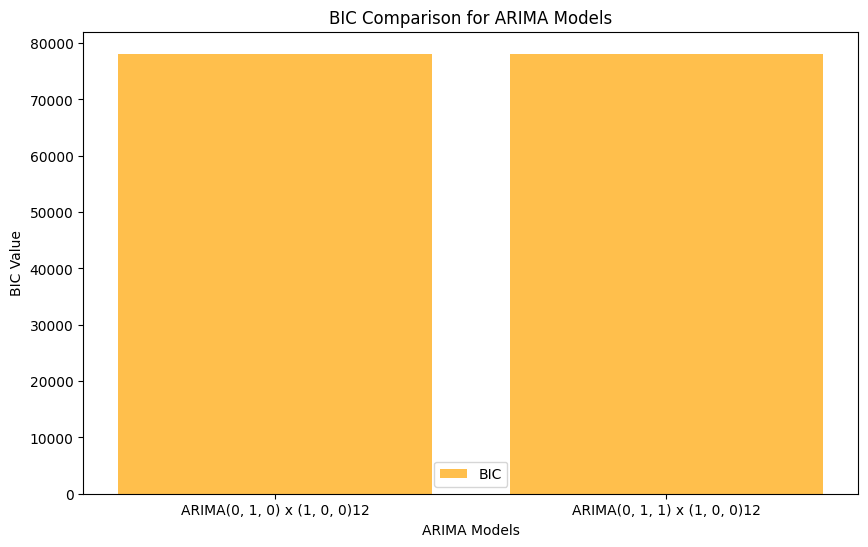

In [ ]:
# Bar plot for BIC
plt.figure(figsize=(10, 6))
plt.bar(model_names, bic_values, color='orange', alpha=0.7, label='BIC')
plt.title('BIC Comparison for ARIMA Models')
plt.xlabel('ARIMA Models')
plt.ylabel('BIC Value')
plt.legend()
plt.show()

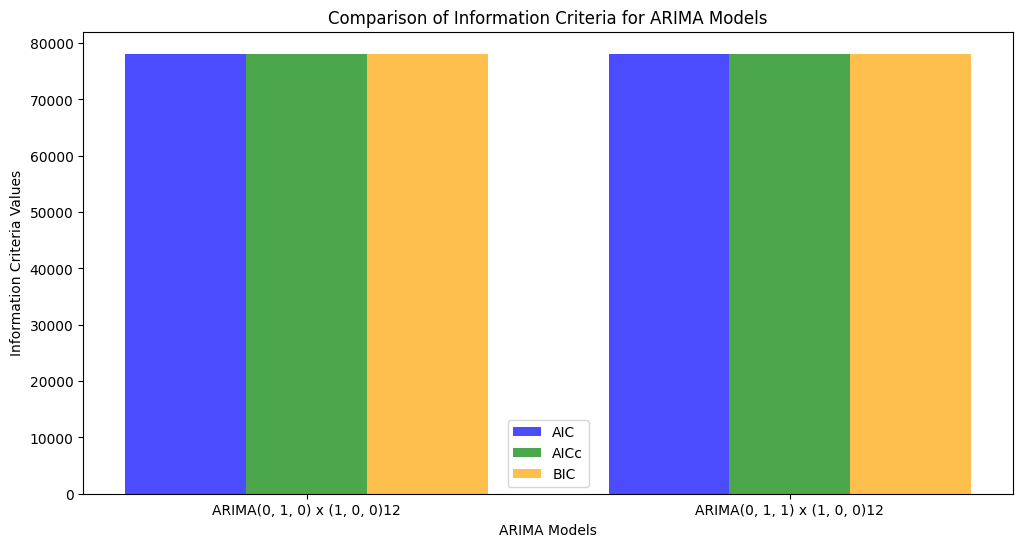

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have AIC, AICc, and BIC values for each model
# Replace these with the actual values obtained from your models
aic_values = [aic_1, aic_2]
aicc_values = [aicc_1, aicc_2]
bic_values = [bic_1, bic_2]

model_names = ['ARIMA(0, 1, 0) x (1, 0, 0)12', 'ARIMA(0, 1, 1) x (1, 0, 0)12']

# Plotting all three information criteria in a single bar plot
bar_width = 0.25
index = np.arange(len(model_names))

plt.figure(figsize=(12, 6))

plt.bar(index - bar_width, aic_values, width=bar_width, color='blue', alpha=0.7, label='AIC')
plt.bar(index, aicc_values, width=bar_width, color='green', alpha=0.7, label='AICc')
plt.bar(index + bar_width, bic_values, width=bar_width, color='orange', alpha=0.7, label='BIC')

plt.title('Comparison of Information Criteria for ARIMA Models')
plt.xlabel('ARIMA Models')
plt.ylabel('Information Criteria Values')
plt.xticks(index, model_names)
plt.legend()

plt.show()


In [ ]:
import pandas as pd

# Assuming you have AIC, AICc, and BIC values for each model
# Replace these with the actual values obtained from your models
aic_values = [aic_1, aic_2]
aicc_values = [aicc_1, aicc_2]
bic_values = [bic_1, bic_2]

model_names = ['ARIMA(0, 1, 0) x (1, 0, 0)12', 'ARIMA(0, 1, 1) x (1, 0, 0)12']

# Create a DataFrame for better presentation
comparison_table = pd.DataFrame({
    'Model': model_names,
    'AIC': aic_values,
    'AICc': aicc_values,
    'BIC': bic_values
})

# Display the comparison table
print(comparison_table)

                          Model           AIC          AICc           BIC
0  ARIMA(0, 1, 0) x (1, 0, 0)12  78088.322059  78088.323171  78102.894067
1  ARIMA(0, 1, 1) x (1, 0, 0)12  78088.667407  78088.669633  78110.525420


In [ ]:
# Display the comparison table
display(comparison_table)


,Model,AIC,AICc,BIC
0,"ARIMA(0, 1, 0) x (1, 0, 0)12",78088.322059,78088.323171,78102.894067
1,"ARIMA(0, 1, 1) x (1, 0, 0)12",78088.667407,78088.669633,78110.525420


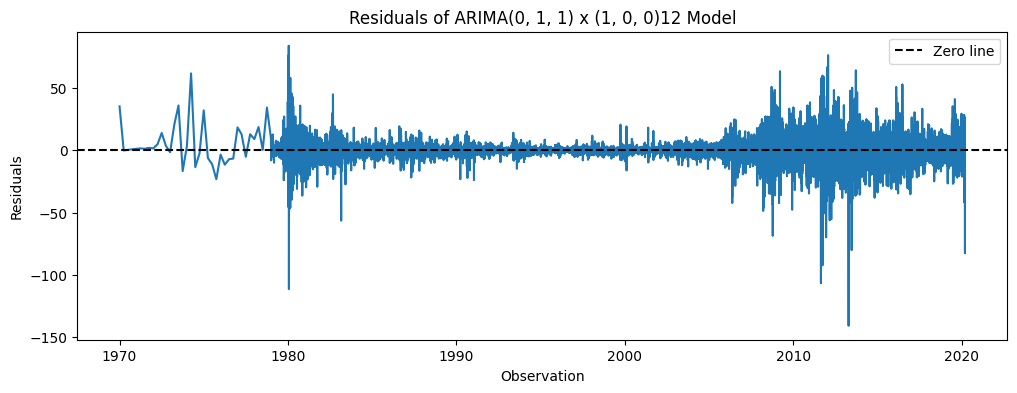

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.gofplots import qqplot

# Assuming you have fitted ARIMA models as arima_results_2
# Replace these with the actual fitted models in your code.

# Extract residuals from ARIMA(0, 1, 1) x (1, 0, 0)12 model
residuals_2 = arima_results_2.resid

# Plot residuals
plt.figure(figsize=(12, 4))
plt.plot(residuals_2)
plt.axhline(y=0, color='black', linestyle='--', label='Zero line')
plt.xlabel("Observation")
plt.ylabel("Residuals")
plt.title("Residuals of ARIMA(0, 1, 1) x (1, 0, 0)12 Model")
plt.legend()
plt.show()

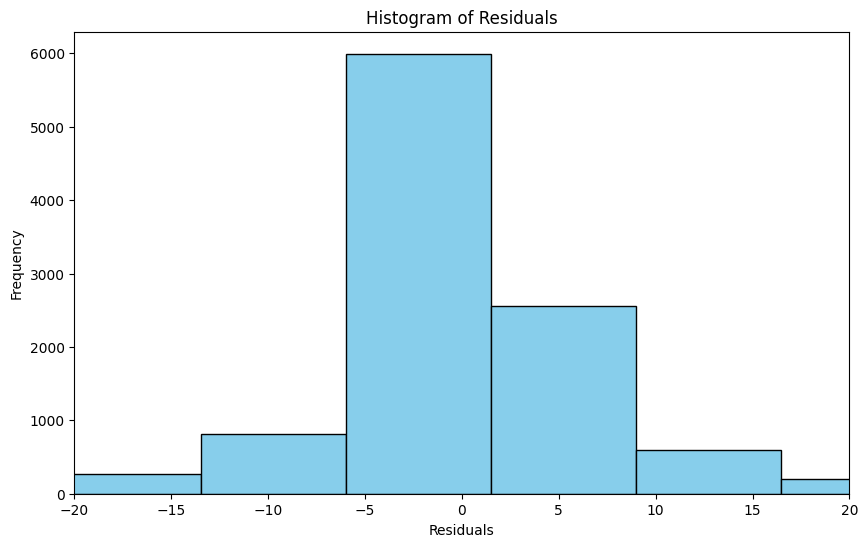

In [ ]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_2, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.xlim(-20, 20)
plt.show()

<Figure size 1000x600 with 0 Axes>

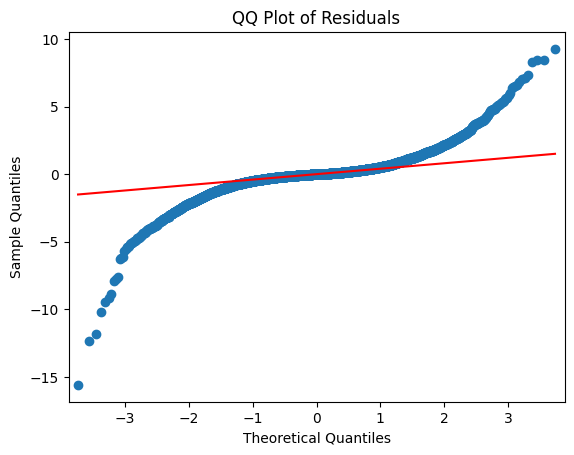

In [ ]:
# QQ plot of residuals
plt.figure(figsize=(10, 6))
qqplot(residuals_2, line='q', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMAResults

# Assuming you have fitted ARIMA models as arima_results_2
# Replace these with the actual fitted models in your code.

# Number of steps ahead
steps_ahead = 12

# Get forecast object
forecast = arima_results_2.get_forecast(steps=steps_ahead)

# Extract mean and standard errors
forecast_mean = forecast.predicted_mean
forecast_se = forecast.se_mean

# Calculate prediction interval
lower_bound = forecast_mean - 1.96 * forecast_se
upper_bound = forecast_mean + 1.96 * forecast_se

# Create a DataFrame for the prediction interval
prediction_interval_df = pd.DataFrame({
    'IB': lower_bound,
    'Pred': forecast_mean,
    'UB': upper_bound
}, index=np.arange(253, 253 + steps_ahead))  # Adjust the starting index

# Display the DataFrame
print(prediction_interval_df)


     IB  Pred  UB
253 NaN   NaN NaN
254 NaN   NaN NaN
255 NaN   NaN NaN
256 NaN   NaN NaN
257 NaN   NaN NaN
258 NaN   NaN NaN
259 NaN   NaN NaN
260 NaN   NaN NaN
261 NaN   NaN NaN
262 NaN   NaN NaN
263 NaN   NaN NaN
264 NaN   NaN NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the time series data in gas_prod
# Replace this with the actual data in your code.
# Also, replace arima_results_2 with your actual ARIMA model results.

plt.figure(figsize=(12, 6))

# Plot observed values
plt.plot(observed_values, label="Observed", color='blue')

# Plot predicted values
plt.plot(predicted_mean, label="Predicted", color='green')

# Plot prediction interval
plt.fill_between(gas_prod_input.index, lower_bound, upper_bound, color='orange', alpha=0.3, label="Prediction Interval")

# Set plot labels and limits
plt.xlabel("Time (months)")
plt.ylabel("Gasoline production (millions of barrels)")

# Add legend
plt.legend()

# Show the plot
plt.show()

NameError: ignored

<Figure size 1200x600 with 0 Axes>